In [1]:
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings('ignore')

import seaborn as sns
import matplotlib.pyplot as plt
from xgboost import XGBRegressor

from sklearn.preprocessing import StandardScaler,OrdinalEncoder

from sklearn.metrics import r2_score

from sklearn.impute import SimpleImputer

from sklearn.model_selection import cross_val_score

from sklearn.model_selection import KFold

from sklearn.pipeline import Pipeline

from sklearn.compose import ColumnTransformer

from sklearn.model_selection import train_test_split

from sklearn.linear_model import LinearRegression

from sklearn.ensemble import RandomForestRegressor

In [2]:
# 1. Reading data from CSV
def read_csv(file_path):
    """
    Read data from a CSV file and return a pandas DataFrame.

    Parameters:
    - file_path: str, the path to the CSV file.

    Returns:
    - pd.DataFrame, the loaded DataFrame.
    """
    return pd.read_csv(file_path)
#2. Getting information and statistics about over dataset
def dataset_info_statistics(data):
    """
    Display information and basic statistics about the dataset.

    Parameters:
    - data: pandas DataFrame, input data.

    Returns:
    - None
    """
    # Display general information about the dataset
    print("Dataset Information:")
    print(data.info())
    print("\n")

    # Display basic statistics for numerical columns
    print("Basic Statistics for Numerical Columns:")
    print(data.describe())
    print("\n")

#3.check for the null values in the dataset
def check_null(data):
    """
    Check for null values in the dataset.

    Parameters:
    - data: pandas DataFrame, input data.

    Returns:
    - pd.Series, the count of null values for each column.
    """
    null_counts = data.isnull().sum()
    print("Null Values in the Dataset:")
    return null_counts

#4.check for duplicated rows in the dataset
def check_duplicates(data):
    """
    Check for duplicated rows in the dataset.

    Parameters:
    - data: pandas DataFrame, input data.

    Returns:
    - bool, True if any duplicated rows exist, False otherwise.
    """
    return data.duplicated().any()

#5. getting basic analysis for numerical and categorical columns
def plot_graph(data):
    """
    Plot graphs for numerical and categorical data in a dataframe.
    
    Parameters:
    - data: Pandas Dataframe, input data.
    
    Returns:
    - None
    
    """
    numerical_columns = data.select_dtypes(include=np.number).columns
     
    for column in numerical_columns:
        plt.figure(figsize=(5,3))
        sns.distplot(data[column],kde=True)
        plt.title(f"Histogram for {column}")
        plt.xlabel(column)
        plt.ylabel("Frequency")
        plt.show()
        
    categorical_columns = data.select_dtypes(include='object').columns
    for column in categorical_columns:
        plt.figure(figsize=(5, 3))
        sns.countplot(data[column])
        plt.title(f'Countplot for {column}')
        plt.xlabel(column)
        plt.ylabel('Count')
        plt.xticks(rotation=45)
        plt.show()
    
#6. Seperate feature and target
def seperate_features_target(data,target_column):
    """
    Separate features and target variable
    
    Parameters: 
    - data: pandas DataFrame, input data.
    - target_column: str, the column representing the target varible.
    
    Returns:
    - X: pandas DataFrame, features.
    - y: pandas Series, target variable.
    
    """
    
    X = data.drop(columns=[target_column],axis=1)
    y = data[target_column]
    
    return X,y
#7. Train test split
def perform_train_test_split(X, y, test_size=0.20, random_state=42):
    """
    Perform train-test split on the dataset.

    Parameters:
    - X: pandas DataFrame, features.
    - y: pandas Series, target variable.
    - test_size: float, optional, the proportion of the dataset to include in the test split (default is 0.2).
    - random_state: int or None, optional, seed for random number generation (default is None).

    Returns:
    - X_train: pandas DataFrame, features for training.
    - X_test: pandas DataFrame, features for testing.
    - y_train: pandas Series, target variable for training.
    - y_test: pandas Series, target variable for testing.
    """
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size, random_state=random_state)

    return X_train, X_test, y_train, y_test

In [3]:
calories = read_csv('calories.csv')
exercise = read_csv('exercise.csv')

In [4]:
data = pd.merge(calories, exercise, on='User_ID')

In [5]:
data.head()

,User_ID,Calories,Gender,Age,Height,Weight,Duration,Heart_Rate,Body_Temp
0,14733363,231.0,male,68,190.0,94.0,29.0,105.0,40.8
1,14861698,66.0,female,20,166.0,60.0,14.0,94.0,40.3
2,11179863,26.0,male,69,179.0,79.0,5.0,88.0,38.7
3,16180408,71.0,female,34,179.0,71.0,13.0,100.0,40.5
4,17771927,35.0,female,27,154.0,58.0,10.0,81.0,39.8


In [6]:
dataset_info_statistics(data)

Dataset Information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15000 entries, 0 to 14999
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   User_ID     15000 non-null  int64  
 1   Calories    15000 non-null  float64
 2   Gender      15000 non-null  object 
 3   Age         15000 non-null  int64  
 4   Height      15000 non-null  float64
 5   Weight      15000 non-null  float64
 6   Duration    15000 non-null  float64
 7   Heart_Rate  15000 non-null  float64
 8   Body_Temp   15000 non-null  float64
dtypes: float64(6), int64(2), object(1)
memory usage: 1.0+ MB
None


Basic Statistics for Numerical Columns:
            User_ID      Calories           Age        Height        Weight  \
count  1.500000e+04  15000.000000  15000.000000  15000.000000  15000.000000   
mean   1.497736e+07     89.539533     42.789800    174.465133     74.966867   
std    2.872851e+06     62.456978     16.980264     14.258114     15.03565

In [7]:
check_null(data)

Null Values in the Dataset:


User_ID       0
Calories      0
Gender        0
Age           0
Height        0
Weight        0
Duration      0
Heart_Rate    0
Body_Temp     0
dtype: int64

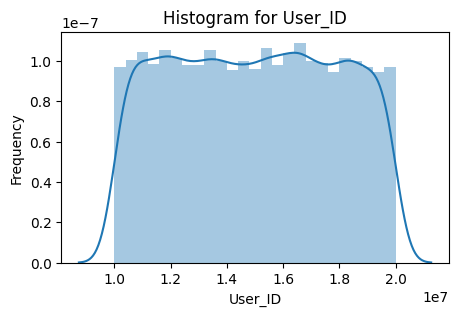

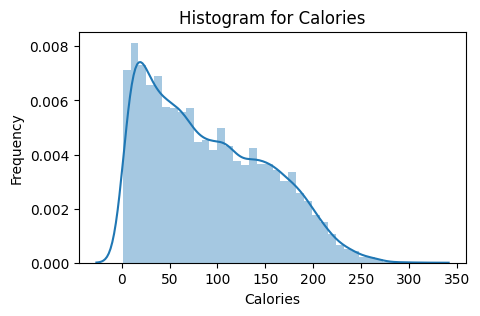

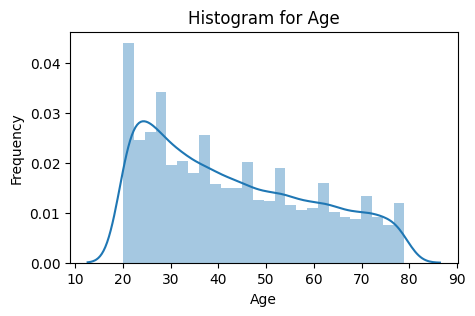

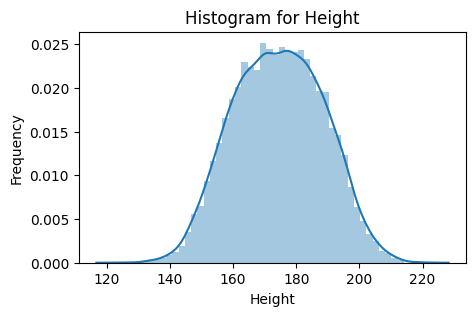

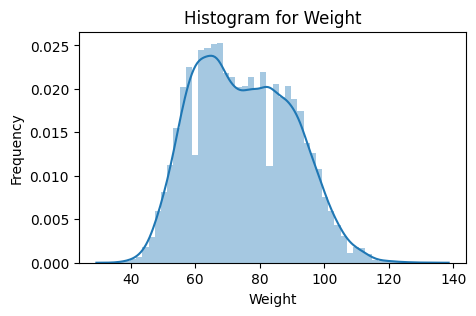

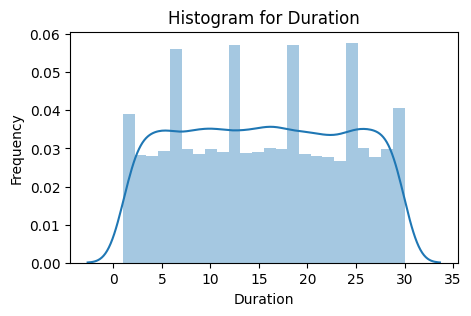

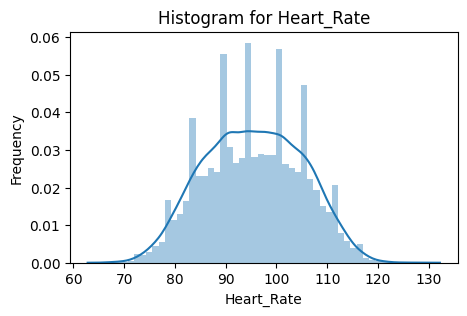

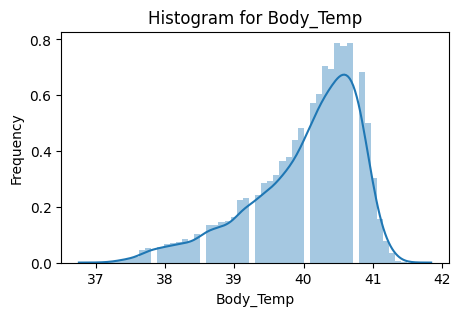

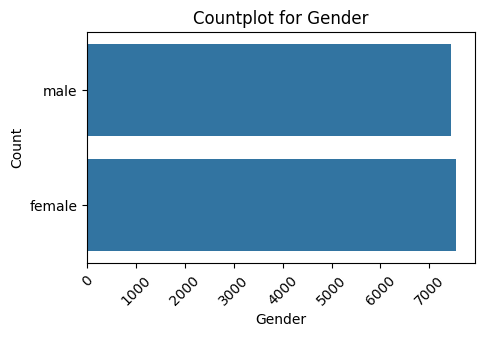

In [8]:
plot_graph(data)

In [9]:
data.columns

Index(['User_ID', 'Calories', 'Gender', 'Age', 'Height', 'Weight', 'Duration',
       'Heart_Rate', 'Body_Temp'],
      dtype='object')

In [10]:
X,y = seperate_features_target(data,'Calories')

In [11]:
X = X.drop(columns=['User_ID'])

### Column Transformer and Pipeline

In [20]:
preprocessor = ColumnTransformer(transformers=[
    ('ordinal',OrdinalEncoder(),['Gender']),
    ('num',StandardScaler(),['Age',
                            'Height',
                            'Weight',
                            'Duration',
                            'Heart_Rate',
                            'Body_Temp']),
],remainder='passthrough')

In [21]:
pipeline = Pipeline([("preprocessor",preprocessor),
                     ("model",LinearRegression())
                    ])

In [14]:
from sklearn.metrics import r2_score
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.metrics import mean_absolute_error

In [37]:
# r2_score(y_test,y_pred)

In [15]:
kfold = KFold(n_splits=5, shuffle=True, random_state=42)

In [22]:
def model_scorer(model_name,model):
    
    output=[]
   
    
    output.append(model_name)
    
    pipeline = Pipeline([
    ('preprocessor',preprocessor),
    ('model',model)])
    
    X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.20,random_state=42)
    
    pipeline.fit(X_train,y_train)
    
    y_pred = pipeline.predict(X_test)
    
    output.append(r2_score(y_test,y_pred))
    output.append(mean_absolute_error(y_test,y_pred))
    
    kfold = KFold(n_splits=5, shuffle=True, random_state=42)
    cv_results = cross_val_score(pipeline, X, y, cv=kfold, scoring='r2')
    output.append(cv_results.mean())
    
    return output

In [23]:
model_dict={
    'log':LinearRegression(),
    'RF':RandomForestRegressor(),
    'XGBR':XGBRegressor(),
}

In [24]:
model_output=[]
for model_name,model in model_dict.items():
    model_output.append(model_scorer(model_name,model))

In [25]:
model_output

[['log',
  0.9672937151257295,
  8.441513553849708,
  np.float64(0.9671402283675841)],
 ['RF',
  0.9982301748805781,
  1.6991600000000004,
  np.float64(0.9979280660711194)],
 ['XGBR',
  0.9988678909361673,
  1.4981198125282924,
  np.float64(0.9988510864545181)]]

In [25]:
preprocessor = ColumnTransformer(transformers=[
    ('ordinal',OrdinalEncoder(),['Gender']),
    ('num',StandardScaler(),['Age',
                            'Height',
                            'Weight',
                            'Duration',
                            'Heart_Rate',
                            'Body_Temp']),
    
],remainder='passthrough')

In [26]:
pipeline = Pipeline([
    ('preprocessor',preprocessor),
    ('model',XGBRegressor())
    
])

In [27]:
pipeline.fit(X,y)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('ordinal', OrdinalEncoder(),
                                                  ['Gender']),
                                                 ('num', StandardScaler(),
                                                  ['Age', 'Height', 'Weight',
                                                   'Duration', 'Heart_Rate',
                                                   'Body_Temp'])])),
                ('model',
                 XGBRegressor(base_score=None, booster=None, callbacks=None,
                              colsample_bylevel=None, colsample_bynode=None,
                              colsample_bytree=None...
                              feature_types=None, feature_weights=None,
                              gamma=None, grow_policy=None,
                              importance_type=None,
                              interaction_constraints=None, learning_rate=None,
                              max_bin=None, max_cat_threshold=None,
                              max_cat_to_onehot=None, max_delta_step=None,
                              max_depth=None, max_leaves=None,
                              min_child_weight=None, missing=nan,
                              monotone_constraints=None, multi_strategy=None,
                              n_estimators=None, n_jobs=None,
                              num_parallel_tree=None, ...))])

In [28]:
sample = pd.DataFrame({
   'Gender':'male',
    'Age':68,
    'Height':190.0,
    'Weight':94.0,
    'Duration':29.0,
    'Heart_Rate':105.0,
    'Body_Temp':40.8,
},index=[0])

In [29]:
pipeline.predict(sample)

array([231.0721], dtype=float32)

### Save The Model

In [66]:
import pickle

In [67]:
with open('pipeline.pkl','wb') as f:
    pickle.dump(pipeline,f)

In [68]:
with open('pipeline.pkl','rb') as f:
    pipeline_saved = pickle.load(f)

In [69]:
result = pipeline_saved.predict(sample)

In [70]:
result 

array([118.28051], dtype=float32)

# Анализ данных

,Correlation with Calories
Calories,1.000000
Duration,0.955421
Heart_Rate,0.897882
Body_Temp,0.824558
Age,0.154395
Weight,0.035481
Height,0.017537


<Figure size 800x500 with 0 Axes>

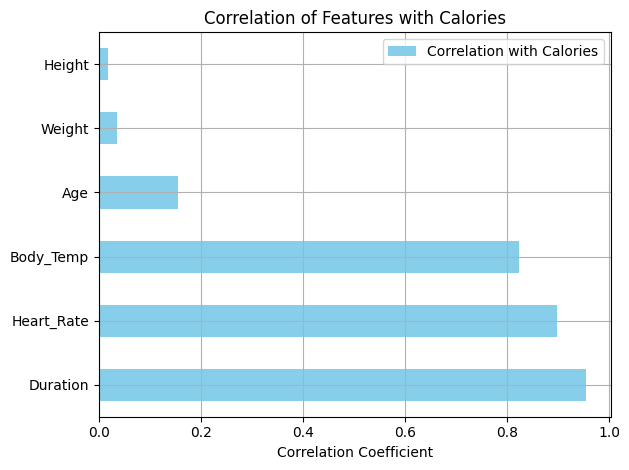

In [100]:
# Исключаем столбец 'User_ID' из анализа
data_clean = data.drop(columns=['User_ID'])

# 1. Таблица корреляции с Calories
correlation_table = data_clean.corr(numeric_only=True)['Calories'].sort_values(ascending=False).to_frame()
correlation_table.columns = ['Correlation with Calories']
display(correlation_table)

# 2. Bar Chart корреляции с Calories
plt.figure(figsize=(8, 5))
correlation_table.drop('Calories').plot(kind='barh', color='skyblue')
plt.title('Correlation of Features with Calories')
plt.xlabel('Correlation Coefficient')
plt.grid(True)
plt.tight_layout()
plt.show()

## Heatmap полной корреляционной матрицы

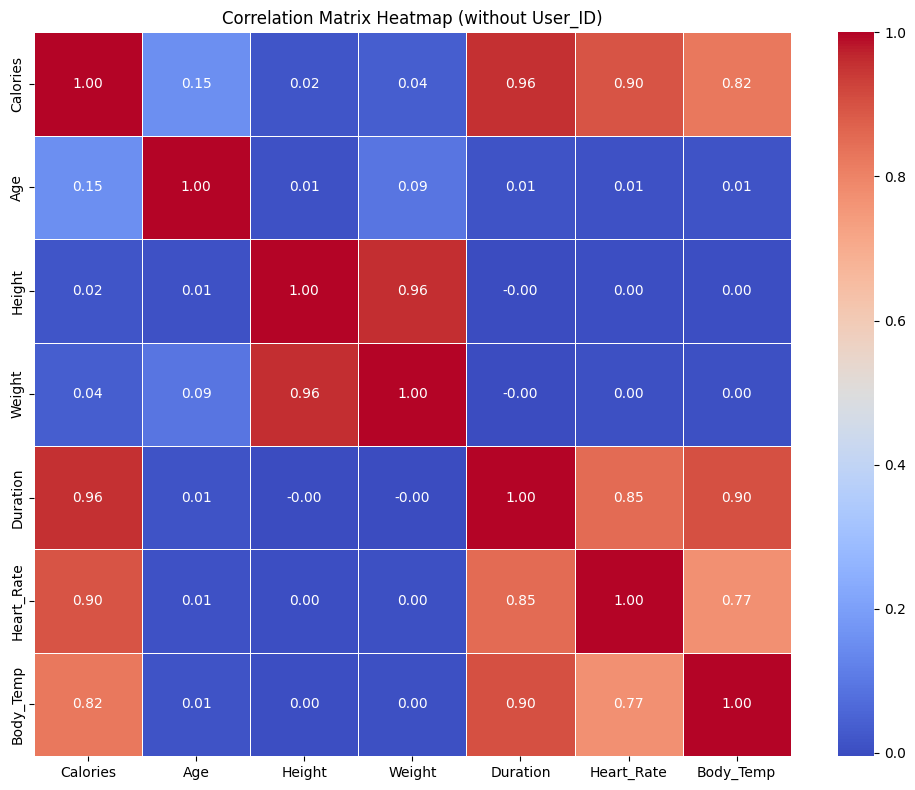

In [89]:
plt.figure(figsize=(10, 8))
corr_matrix = data_clean.corr(numeric_only=True)

sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Correlation Matrix Heatmap (without User_ID)')
plt.tight_layout()
plt.show()

# Сравнение производительности моделей

In [90]:
from sklearn.metrics import mean_squared_error, r2_score

# Подготовка данных
X = data.drop(columns=['User_ID', 'Calories']).copy()
y = data['Calories'].copy()

X = pd.get_dummies(X, drop_first=True)

features_to_scale = ['Duration', 'Heart_Rate', 'Body_Temp']
scaler = StandardScaler()
X[features_to_scale] = scaler.fit_transform(X[features_to_scale])

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Модели
models = {
    'Linear Regression': LinearRegression(),
    'Random Forest': RandomForestRegressor(random_state=42),
    'XGBoost': XGBRegressor(random_state=42, verbosity=0)
}

results = {}
for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)

    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)

    results[name] = {
        'model': model,
        'predictions': y_pred,
        'mse': mse,
        'r2': r2
    }

# Таблица результатов
results_df = pd.DataFrame([
    {'Model': name, 'MSE': round(info['mse'], 2), 'R² Score': round(info['r2'], 4)}
    for name, info in results.items()
])
print("Сравнение моделей:")
display(results_df)

Сравнение моделей:


,Model,MSE,R² Score
0,Linear Regression,132.00,0.9673
1,Random Forest,7.12,0.9982
2,XGBoost,4.57,0.9989


## Визуализация предсказаний vs. фактические значения

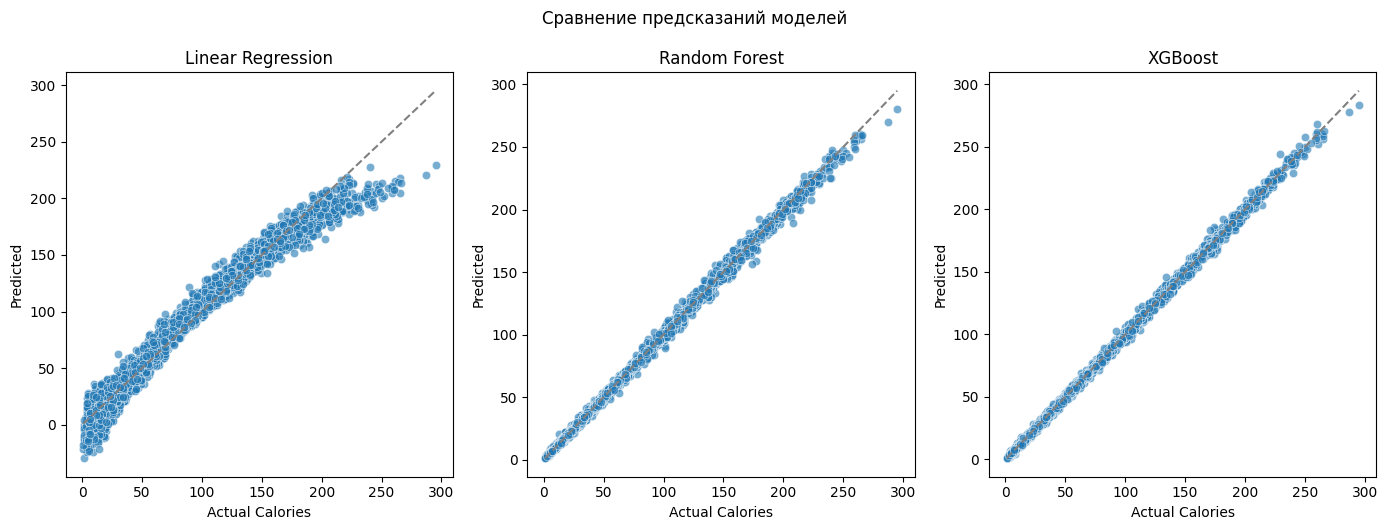

In [95]:
plt.figure(figsize=(14, 5))
for i, (name, info) in enumerate(results.items(), 1):
    plt.subplot(1, 3, i)
    sns.scatterplot(x=y_test, y=info['predictions'], alpha=0.6)
    plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], '--', color='gray')
    plt.xlabel('Actual Calories')
    plt.ylabel('Predicted')
    plt.title(f'{name}')
plt.tight_layout()
plt.suptitle('Сравнение предсказаний моделей', y=1.05)
plt.show()

## Важность признаков: Random Forest и XGBoost


Важность признаков для Random Forest:


,Feature,Importance
3,Duration,0.913865
4,Heart_Rate,0.048345
0,Age,0.026337
6,Gender_male,0.006722
2,Weight,0.002981
1,Height,0.001243
5,Body_Temp,0.000507


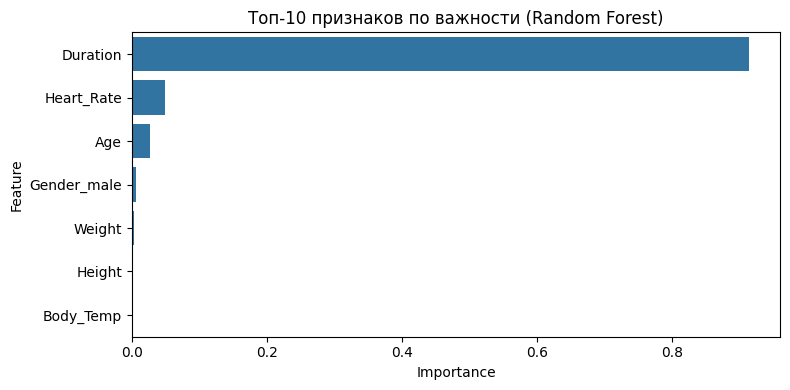


Важность признаков для XGBoost:


,Feature,Importance
3,Duration,0.903929
4,Heart_Rate,0.045256
6,Gender_male,0.024909
0,Age,0.020796
2,Weight,0.004734
1,Height,0.000213
5,Body_Temp,0.000161


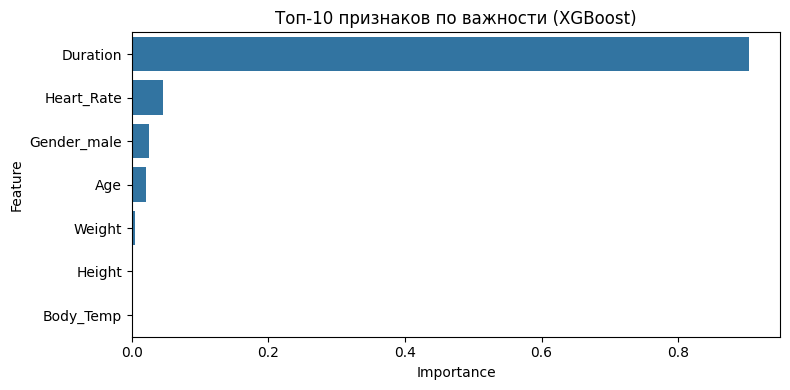

In [102]:
for name in ['Random Forest', 'XGBoost']:
    model = results[name]['model']
    importances = model.feature_importances_
    feature_importance = pd.DataFrame({
        'Feature': X.columns,
        'Importance': importances
    }).sort_values(by='Importance', ascending=False)

    print(f"\nВажность признаков для {name}:")
    display(feature_importance)

    plt.figure(figsize=(8, 4))
    sns.barplot(x='Importance', y='Feature', data=feature_importance.head(10))
    plt.title(f'Топ-10 признаков по важности ({name})')
    plt.tight_layout()
    plt.show()